STEP 0: Install Required Libraries (only once)
Run this in your terminal or notebook if not installed:

In [ ]:
pip install tensorflow tensorflow-datasets matplotlib


STEP 1: Import Libraries and Load the EMNIST Letters Dataset

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the EMNIST Letters dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',                  # Dataset name
    split=['train', 'test'],          # Training and testing sets
    shuffle_files=True,
    as_supervised=True,               # Return (image, label) pairs
    with_info=True                    # Get metadata (like num_classes)
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.YM5VJD_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.YM5VJD_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.


 STEP 2: Preprocess the Images

In [2]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0       # Normalize pixel values to [0, 1]
    image = tf.transpose(image, perm=[1, 0, 2])       # EMNIST images are rotated
    label = label - 1                                 # Convert labels from 1–26 to 0–25
    return image, label


 STEP 3: Prepare Data Pipelines (Batch and Shuffle)

In [3]:
BATCH_SIZE = 128

# Prepare training dataset
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Prepare test dataset
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


STEP 4: Build the CNN Model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 classes: A–Z
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


STEP 5: Compile the Model

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


STEP 6: Train the Model

In [6]:
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10
)


Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 80s 112ms/step - accuracy: 0.5567 - loss: 1.4944 - val_accuracy: 0.8699 - val_loss: 0.4025
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - accuracy: 0.8327 - loss: 0.5259 - val_accuracy: 0.8921 - val_loss: 0.3225
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.8602 - loss: 0.4378 - val_accuracy: 0.9021 - val_loss: 0.2972
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 71s 102ms/step - accuracy: 0.8798 - loss: 0.3723 - val_accuracy: 0.9116 - val_loss: 0.2666
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 87s 108ms/step - accuracy: 0.8906 - loss: 0.3406 - val_accuracy: 0.9137 - val_loss: 0.2558
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 76s 101ms/step - accuracy: 0.8994 - loss: 0.3076 - val_accuracy: 0.9169 - val_loss: 0.2452
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 71s 102ms/step - accuracy: 0.9064 - loss: 0.2860 - val_accuracy: 0.9191 - val_loss: 0.2327
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9108 - loss: 0

STEP 7: Evaluate the Model

In [7]:
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")


116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9251 - loss: 0.2255
✅ Test Accuracy: 92.45%


STEP 8: Plot Training History

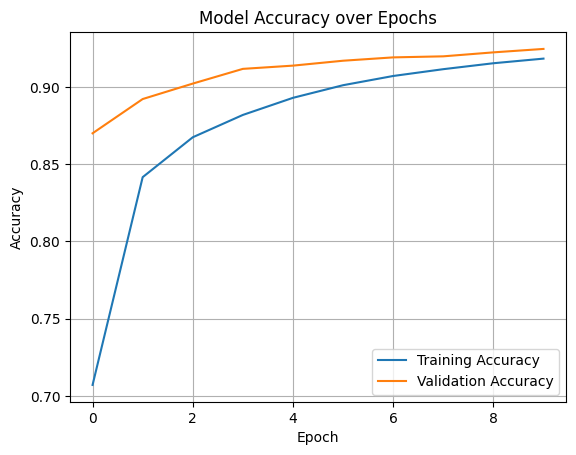

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
